In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox
import contextily as ctx
import seaborn as sns
import geopandas
import fiona
import pandas_access as mdb
import os
pd.set_option('max_columns', None)

# Data excel dictionary

In [26]:
path_directory = "/home/jmmontoyaz/Documents/DS4A/Project/"

In [27]:
df = pd.read_excel(path_directory+ "IGAC_DATASET/BASE_DICCIONARIO_NOMBRES_GEOGRAFICOS/diccionario.xlsx")
df

,ID_NOMBRES_GEO,NOMBRE,DESCRIPCION,CODIGO,TIPO,FUENTE,NOMBRE_BUSQUEDA
0,1,SAN GABRIEL DE CAÑO COLORADO,SAN GABRIEL DE CAÑO COLORADO. Sitio en el muni...,97001,Sitio,NaN,SAN GABRIEL DE CAÑO COLORADO
1,2,YAPÚ,"YAPÚ. Caño en el municipio de Mitú, departamen...",97001,Caño,NaN,YAPÚ
2,3,SAÑAÑA,SAÑAÑA. Caño que sirve de límite entre el muni...,97,Caño,NaN,SAÑAÑA
3,4,ARARÁ,"ARARÁ. Sitio en el municipio de Mitú, departam...",97001,Sitio,NaN,ARARÁ
4,5,GUADALAJARA,"GUADALAJARA. Sitio en el municipio de Mitú, de...",97001,Sitio,NaN,GUADALAJARA
...,...,...,...,...,...,...,...
231683,554832,WIRAVAZÚ,"WIRAVAZÚ. Sitio en el municipio de Mitú, depar...",97001,Sitio,NaN,WIRAVAZÚ
231684,554833,BARRANCO COLORADO,BARRANCO COLORADO. Sitio en el municipio de Mi...,97001,Sitio,NaN,BARRANCO COLORADO
231685,554834,TATÚ,"TATÚ. Sitio en el municipio de Mitú, departame...",97001,Sitio,NaN,TATÚ
231686,554835,SAN JORGE,"SAN JORGE. Sitio en el municipio de Mitú, depa...",97001,Sitio,NaN,SAN JORGE


In [28]:
df.describe(include="all")

,ID_NOMBRES_GEO,NOMBRE,DESCRIPCION,CODIGO,TIPO,FUENTE,NOMBRE_BUSQUEDA
count,231688.000000,231688,231688,231688,231688,0.0,231688
unique,NaN,63791,231140,1162,151,NaN,63791
top,NaN,LA ESPERANZA,LA ESPERANZA. Sitio en el municipio de Bolívar...,44847,Sitio,NaN,ESPERANZA (LA)
freq,NaN,1630,4,3346,109788,NaN,1630
mean,363600.123127,NaN,NaN,NaN,NaN,NaN,NaN
std,162035.285340,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,343087.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,406385.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,466072.250000,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.iloc[0,2]

'SAN GABRIEL DE CAÑO COLORADO. Sitio en el municipio de Mitú, departamento del Vaupés, al sur de la cabecera municipal. Comunicado a ella por vía fluvial. Allí funciona un establecimiento educativo.'

In [30]:
len(df["TIPO"].unique())

151

In [31]:
df[df["DESCRIPCION"].str.contains('municipio de Chaparral')]["DESCRIPCION"]

34893     CHONTADURO. Vereda en el municipio de Chaparra...
34898     LEMAYA. Vereda en el municipio de Chaparral, d...
34900     LA ESPERANZA. Sitio en el municipio de Chaparr...
34902     LA LAGUNA. Sitio en el municipio de Chaparral,...
34905     YAGUARÁ. Vereda en el municipio de Chaparral, ...
                                ...                        
208716    SANTA INÉS. Sitio en el municipio de Chaparral...
210729    AMOYÁ LA ESPERANZA.Central Eléctrica en el mun...
210967    NAVAS PARDO. Aeródromo clase F, ubicado al est...
211587    TRES ESTRELLAS. Cerro de la cordillera Central...
212402    LA LEJÍA. Puente sobre el río Amoyá en el muni...
Name: DESCRIPCION, Length: 746, dtype: object

## Toponyms of municipio de Chaparral

In [32]:
chaparral = df.loc[df["DESCRIPCION"].str.contains("municipio de Chaparral"),:]
chaparral

,ID_NOMBRES_GEO,NOMBRE,DESCRIPCION,CODIGO,TIPO,FUENTE,NOMBRE_BUSQUEDA
34893,38544,CHONTADURO,CHONTADURO. Vereda en el municipio de Chaparra...,73168,Vereda,NaN,CHONTADURO
34898,38549,LEMAYA,"LEMAYA. Vereda en el municipio de Chaparral, d...",73168,Vereda,NaN,LEMAYA
34900,38551,LA ESPERANZA,LA ESPERANZA. Sitio en el municipio de Chaparr...,73168,Sitio,NaN,ESPERANZA (LA)
34902,38553,LA LAGUNA,"LA LAGUNA. Sitio en el municipio de Chaparral,...",73168,Sitio,NaN,LAGUNA (LA)
34905,38556,YAGUARÁ,"YAGUARÁ. Vereda en el municipio de Chaparral, ...",73168,Vereda,NaN,YAGUARÁ
...,...,...,...,...,...,...,...
208716,527342,SANTA INÉS,SANTA INÉS. Sitio en el municipio de Chaparral...,73168,Sitio,NaN,SANTA INÉS
210729,529592,AMOYÁ LA ESPERANZA,AMOYÁ LA ESPERANZA.Central Eléctrica en el mun...,73168,Central Eléctrica,NaN,AMOYÁ LA ESPERANZA
210967,530070,NAVAS PARDO,"NAVAS PARDO. Aeródromo clase F, ubicado al est...",73168,Aeropuerto,NaN,NAVAS PARDO
211587,531446,TRES ESTRELLAS,TRES ESTRELLAS. Cerro de la cordillera Central...,73168,Cerro,NaN,TRES ESTRELLAS


In [33]:
chaparral = chaparral.drop(columns="FUENTE")

In [34]:
len(chaparral["ID_NOMBRES_GEO"].unique())

746

In [35]:
len(chaparral["NOMBRE"].unique())

538

In [36]:
len(chaparral["TIPO"].unique())

25

### Datapoints summary
* Number of rows = 746
* Unique toponyms = 538
* Unique types of places = 25

### Frequency of types 

In [37]:
df2 = chaparral.groupby(by="TIPO").count()["NOMBRE"].reset_index().sort_values("NOMBRE", ascending=False)

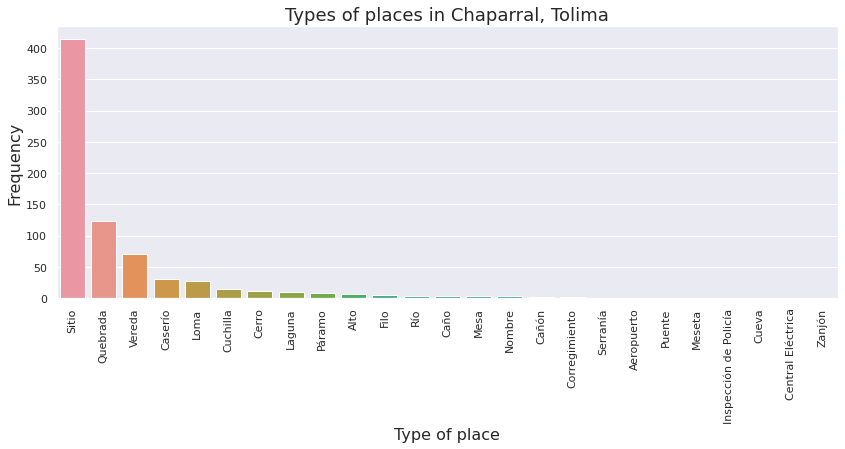

In [38]:
sns.set()
fig,ax = plt.subplots(figsize=(14,5))
ax = sns.barplot(x="TIPO", y="NOMBRE", data=df2)
ax.set_title("Types of places in Chaparral, Tolima", fontsize=18)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_xlabel("Type of place", fontsize=16)
_ = ax.set_xticklabels(list(df2["TIPO"].unique()),rotation=90)

In [39]:
(chaparral["NOMBRE"].value_counts()[0:5])

EL PORVENIR     7
LA PRADERA      7
EL DIAMANTE     7
BUENOS AIRES    6
LA ARENOSA      5
Name: NOMBRE, dtype: int64

In [40]:
chaparral[chaparral["NOMBRE"]=="EL PORVENIR"]

,ID_NOMBRES_GEO,NOMBRE,DESCRIPCION,CODIGO,TIPO,NOMBRE_BUSQUEDA
35341,38997,EL PORVENIR,EL PORVENIR. Sitio en el municipio de Chaparra...,73168,Sitio,PORVENIR (EL)
72693,358297,EL PORVENIR,EL PORVENIR. Sitio en el municipio de Chaparra...,73168,Sitio,PORVENIR (EL)
72759,358368,EL PORVENIR,EL PORVENIR. Sitio en el municipio de Chaparra...,73168,Sitio,PORVENIR (EL)
72812,358421,EL PORVENIR,EL PORVENIR. Sitio en el municipio de Chaparra...,73168,Sitio,PORVENIR (EL)
72830,358439,EL PORVENIR,EL PORVENIR. Sitio en el municipio de Chaparra...,73168,Sitio,PORVENIR (EL)
104674,394768,EL PORVENIR,EL PORVENIR. Sitio en el municipio de Chaparra...,73168,Sitio,PORVENIR (EL)
104675,394769,EL PORVENIR,EL PORVENIR. Sitio en el municipio de Chaparra...,73168,Sitio,PORVENIR (EL)


# Databases

## Merge layer of geo_db

In [2]:
import pickle

In [3]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
gdb = load_obj(r'geo_db')

In [5]:
gdb = pd.read_pickle('geo_db.pkl')

In [6]:
for layer, gdf in gdb.items():
    gdf['origin_layer'] = layer
    gdf.columns = gdf.columns.str.lower()
    gdf.fillna(value = np.nan, inplace = True)
     

In [7]:
Construccion_P = gdb['Construccion_P']
Administrativo_P = gdb['Administrativo_P']
Puente_P = gdb['Puente_P']
Laguna = gdb['Laguna']
Drenaje_Sencillo = gdb['Drenaje_Sencillo']
Drenaje_Doble = gdb['Drenaje_Doble']
Orografia = gdb['Orografia']

In [8]:
to_concat = [Drenaje_Sencillo, Drenaje_Doble, Construccion_P, Administrativo_P,Puente_P, Laguna, Orografia]

In [9]:
df_consolited = pd.concat(to_concat, axis = 0, ignore_index = True)
# df_consolited['GEO_DATABASE'] = True
# df_consolited['GOOGLE_MAPS'] = False
# df_consolited['OPEN_STREET_MAPS'] = False
# df_consolited['AERIAL_PHOTOGRAPH']  = False
# df_consolited['CARTOGRAPHIC_SHEET'] = False
df_consolited.shape

(2779, 24)

In [10]:
sum_files = 0
for layer, df in gdb.items():
    sum_files += df.shape[0]
sum_files

2779

In [11]:
df_consolited.dropna(how = 'all', axis = 1, inplace = True)

In [12]:
df_consolited.shape

(2779, 22)

In [13]:
df_consolited.head(3)

,estado_drenaje,proyecto,symbol,dispersion,nombre_geografico,pk_cue,cambio,vigencia,fecha_modificacion,hoja,pk_cue_cambio,ruleid,object_id_origen,shape_length,geometry,origin_layer,tipo,shape_area,codigo_uso_edificacion,rotacion,codigo_nombre,funcion_puente
0,5101.0,NaN,2,0,Río Buga La Grande,1895143.0,NaN,0,2015-01-05T00:00:00+00:00,262IIIB,NaN,3.0,604802.0,13162.341047,MULTILINESTRING Z ((4685379.738 1996365.957 0....,Drenaje_Sencillo,NaN,NaN,NaN,NaN,NaN,NaN
1,5101.0,NaN,2,0,Quebrada El Bosque,1891637.0,NaN,0,2015-01-05T00:00:00+00:00,262IIIB,NaN,3.0,604808.0,845.971875,MULTILINESTRING Z ((4682329.973 2005625.166 0....,Drenaje_Sencillo,NaN,NaN,NaN,NaN,NaN,NaN
2,5101.0,NaN,2,0,Quebrada Los Osos,1892001.0,NaN,0,2015-01-05T00:00:00+00:00,262IIIB,NaN,3.0,604822.0,2881.287726,MULTILINESTRING Z ((4682307.737 2001177.363 0....,Drenaje_Sencillo,NaN,NaN,NaN,NaN,NaN,NaN


Administrativo_P
Construccion_P
Drenaje_Doble
Drenaje_Sencillo
Laguna
Orografia
Puente_P


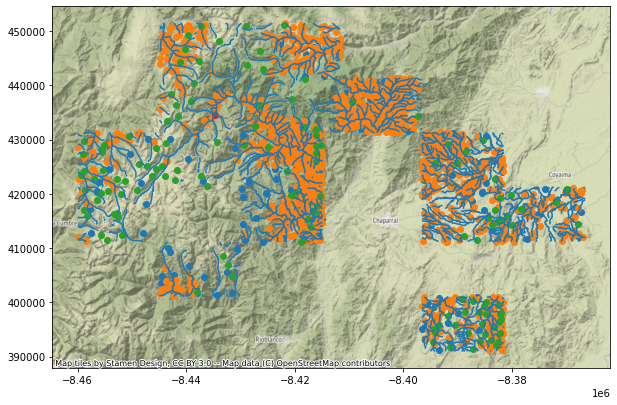

In [14]:
fig,ax = plt.subplots(figsize=(10,10))
for layer, df in df_consolited.groupby(by = 'origin_layer'):
    print(layer)
    df = df.to_crs(epsg=3857)
    df.plot(ax=ax)
ctx.add_basemap(ax)

In [15]:
sites = ["vereda","cuchilla","filo","laguna","loma","inspección de policía","páramo", "río","quebrada", 
         "loma", "chorro" , "caño", "zanja", "colegio", "escuela", "hospital", "cementerio", "instituto",
         "iglesia", "carcel", "institución", "parque", "corregimiento", "morro", "páramo", "cordillera", 
         "cañón", "cañada", "hacienda", "quebradas", "puesto de salud", "puesto de policía", "puesto de monta",
        "núcleo escolar", "alcaldía", "templo", "establecimiento educativo", "finca", "inspección departamental",
        "sector"]

In [16]:
# plaza, mina, calle
# df_consolited[df_consolited.nombre_geografico.str.lower().str.contains('sector')]
# df_consolited.replace("Nucleo Escolar Olaya Herrera", "Núcleo Escolar Olaya Herrera", inplace=True)

In [17]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [18]:
def site(geo_name):
    for site in sites:
        if site in geo_name.lower():
            return site.capitalize()
    return np.nan

In [19]:
df_consolited["site"] = df_consolited.nombre_geografico.apply(site)

In [20]:
#Actualizar sites
# for name in df_consolited[~df_consolited.site.isin(sites)].nombre_geografico:
#     name_split = name.split()[0].lower()
#     if name_split in sites: pass
# #         print('esta', name_split)
#     else:
#         if not(name_split in ['el', 'la', 'los', 'las']):
#             print(name_split)
#             sites.append(name_split)
    

In [21]:
df_consolited.to_csv("geo_datase_temporal.csv")
df_consolited.to_pickle("geo_datase_temporal.pkl")

In [22]:
water_gdfs = df_consolited[(df_consolited.site == 'Río') | (df_consolited.site == 'Quebrada')]

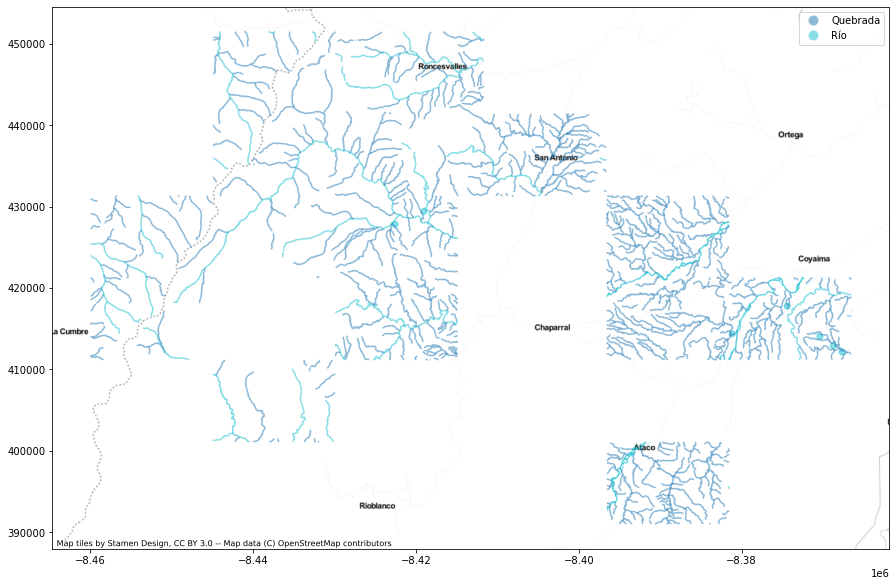

In [23]:
fig,ax = plt.subplots(figsize=(15,15))
water_gdfs = water_gdfs.to_crs(epsg=3857)
water_gdfs.plot(column="site", ax=ax, legend=True, alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 

## Merge dictionary with consolited

In [41]:
df_consolited = pd.read_csv("geo_datase_temporal.csv")

In [42]:
df_consolited = pd.read_pickle("geo_datase_temporal.pkl")

In [43]:
df_consolited.head()

,estado_drenaje,proyecto,symbol,dispersion,nombre_geografico,pk_cue,cambio,vigencia,fecha_modificacion,hoja,pk_cue_cambio,ruleid,object_id_origen,shape_length,geometry,origin_layer,tipo,shape_area,codigo_uso_edificacion,rotacion,codigo_nombre,funcion_puente,site
0,5101.0,NaN,2,0,Río Buga La Grande,1895143.0,NaN,0,2015-01-05T00:00:00+00:00,262IIIB,NaN,3.0,604802.0,13162.341047,MULTILINESTRING Z ((4685379.738 1996365.957 0....,Drenaje_Sencillo,NaN,NaN,NaN,NaN,NaN,NaN,Río
1,5101.0,NaN,2,0,Quebrada El Bosque,1891637.0,NaN,0,2015-01-05T00:00:00+00:00,262IIIB,NaN,3.0,604808.0,845.971875,MULTILINESTRING Z ((4682329.973 2005625.166 0....,Drenaje_Sencillo,NaN,NaN,NaN,NaN,NaN,NaN,Quebrada
2,5101.0,NaN,2,0,Quebrada Los Osos,1892001.0,NaN,0,2015-01-05T00:00:00+00:00,262IIIB,NaN,3.0,604822.0,2881.287726,MULTILINESTRING Z ((4682307.737 2001177.363 0....,Drenaje_Sencillo,NaN,NaN,NaN,NaN,NaN,NaN,Quebrada
3,5101.0,NaN,2,0,Quebrada Honda,1891648.0,NaN,0,2015-01-05T00:00:00+00:00,262IIIB,NaN,3.0,604856.0,2501.310790,MULTILINESTRING Z ((4682976.723 1996377.782 0....,Drenaje_Sencillo,NaN,NaN,NaN,NaN,NaN,NaN,Quebrada
4,5101.0,NaN,2,0,Quebrada El Vergel,1895523.0,NaN,0,2015-01-05T00:00:00+00:00,262IIIB,NaN,3.0,604857.0,2388.680722,MULTILINESTRING Z ((4687564.250 1996355.208 0....,Drenaje_Sencillo,NaN,NaN,NaN,NaN,NaN,NaN,Quebrada


In [44]:
def merge_dic_and_consol(row):
    name = row.NOMBRE.lower()
    id_row = row.name
    temp = df_consolited[df_consolited.nombre_geografico.str.lower() == name]
    if len(temp) > 0:
        chaparral.loc[id_row, 'consolited'] = True
        chaparral.loc[id_row, 'coincidences'] = len(temp)
        
        if len(temp) == 1:
            df_consolited.loc[temp.index, 'dictionary'] = True

        

In [45]:
chaparral['consolited'] = False
chaparral['coincidences'] = 0
df_consolited['dictionary'] = False

In [46]:
chaparral.apply(merge_dic_and_consol, axis = 1)

34893     None
34898     None
34900     None
34902     None
34905     None
          ... 
208716    None
210729    None
210967    None
211587    None
212402    None
Length: 746, dtype: object

In [47]:
df_consolited[df_consolited.dictionary]

,estado_drenaje,proyecto,symbol,dispersion,nombre_geografico,pk_cue,cambio,vigencia,fecha_modificacion,hoja,pk_cue_cambio,ruleid,object_id_origen,shape_length,geometry,origin_layer,tipo,shape_area,codigo_uso_edificacion,rotacion,codigo_nombre,funcion_puente,site,dictionary
790,NaN,NaN,1,NaN,Las Nieves,1299797.0,NaN,0,2015-01-05T00:00:00+00:00,262IIIB,NaN,10.0,705736.0,NaN,POINT Z (4685841.657 2004110.838 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,True
804,NaN,NaN,1,NaN,La Cascada,1308949.0,NaN,0,2015-01-05T00:00:00+00:00,262IIIB,NaN,10.0,705781.0,NaN,POINT Z (4691936.145 1997318.912 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,True
827,NaN,NaN,1,NaN,Las Villas,1298528.0,NaN,0,2014-12-05T00:00:00+00:00,262IVC,NaN,10.0,705837.0,NaN,POINT Z (4703823.470 1989017.155 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,True
828,NaN,NaN,1,NaN,Las Bolsas,1298511.0,NaN,0,2014-12-05T00:00:00+00:00,262IVC,NaN,10.0,705841.0,NaN,POINT Z (4706719.395 1988954.816 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,True
835,NaN,NaN,1,NaN,Manzanares,1302117.0,NaN,0,2014-12-05T00:00:00+00:00,262IVC,NaN,10.0,705855.0,NaN,POINT Z (4707600.484 1987199.553 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,NaN,NaN,1,NaN,Las Vegas,1294090.0,NaN,0,2016-09-01T00:00:00+00:00,281IC,NaN,10.0,NaN,NaN,POINT Z (4668669.129 1966610.895 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,True
2428,NaN,NaN,1,NaN,La Cueva,7151460.0,NaN,0,2016-09-09T00:00:00+00:00,281IIIB,NaN,10.0,NaN,NaN,POINT Z (4682398.952 1957173.415 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,True
2432,NaN,NaN,1,NaN,El Prodigio,1295395.0,NaN,0,2016-09-09T00:00:00+00:00,281IIIB,NaN,10.0,NaN,NaN,POINT Z (4686112.076 1957759.271 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,True
2433,NaN,NaN,1,NaN,Albania,1295410.0,NaN,0,2016-09-09T00:00:00+00:00,281IIIB,NaN,10.0,NaN,NaN,POINT Z (4684074.957 1957825.479 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,True


In [48]:
duplicate_names_dictionary = {}
for name, df in chaparral.groupby(by = 'NOMBRE'):
    if (len(df) > 1) and not(name in duplicate_names_dictionary):
        duplicate_names_dictionary[name] = len(df)
len(duplicate_names_dictionary )      

132

In [49]:
duplicate_names_consolited = {}
for name, df in df_consolited.groupby(by = 'nombre_geografico'):
    if (len(df) > 1) and not(name in duplicate_names_consolited):
        duplicate_names_consolited[name] = len(df)
len(duplicate_names_consolited)

390

In [50]:
duplicate_names_consolited['La Esperanza']

35

In [51]:
chaparral[chaparral.NOMBRE == 'LA ESPERANZA'].iloc[0].DESCRIPCION

'LA ESPERANZA. Sitio en el municipio de Chaparral, departamento del Tolima, al noreste de la cabecera municipal. Comunicado a ella por carretera.'

In [52]:
chaparral[chaparral.NOMBRE == 'LA ESPERANZA'].iloc[1].DESCRIPCION

'LA ESPERANZA. Sitio en el municipio de Chaparral, departamento del Tolima, al suroeste de la cabecera municipal. Comunicado a ella por camino y carretera.'

In [53]:
chaparral[chaparral.NOMBRE == 'LA ESPERANZA'].iloc[2].DESCRIPCION

'LA ESPERANZA. Sitio en el municipio de Chaparral, departamento  del Tolima, al noroeste de la cabecera municipal. Comunicado a ella por camino y carretera.'

In [54]:
p = df_consolited[df_consolited.nombre_geografico.str.lower() == "LA ESPERANZA".lower()]
p

,estado_drenaje,proyecto,symbol,dispersion,nombre_geografico,pk_cue,cambio,vigencia,fecha_modificacion,hoja,pk_cue_cambio,ruleid,object_id_origen,shape_length,geometry,origin_layer,tipo,shape_area,codigo_uso_edificacion,rotacion,codigo_nombre,funcion_puente,site,dictionary
788,NaN,NaN,1,NaN,La Esperanza,1300186.0,NaN,0,2015-01-05T00:00:00+00:00,262IIIB,NaN,10.0,705734.0,NaN,POINT Z (4690507.686 2003055.826 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,False
992,NaN,NaN,1,NaN,La Esperanza,4711329.0,NaN,0,2015-03-05T00:00:00+00:00,282IIA,NaN,10.0,999302.0,NaN,POINT Z (4735077.381 1986140.260 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,False
1036,NaN,NaN,1,NaN,La Esperanza,4711370.0,NaN,0,2015-03-05T00:00:00+00:00,282IIA,NaN,10.0,999349.0,NaN,POINT Z (4730919.486 1978451.893 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,False
1059,NaN,NaN,1,NaN,La Esperanza,4711390.0,NaN,0,2015-03-05T00:00:00+00:00,282IIA,NaN,10.0,999372.0,NaN,POINT Z (4741818.706 1978042.004 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,False
1084,NaN,NaN,1,NaN,La Esperanza,4711853.0,NaN,0,2015-03-05T00:00:00+00:00,282IIA,NaN,10.0,999765.0,NaN,POINT Z (4730865.900 1983046.702 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,False
1099,NaN,NaN,1,NaN,La Esperanza,4711936.0,NaN,0,2015-03-05T00:00:00+00:00,282IIA,NaN,10.0,1000015.0,NaN,POINT Z (4733238.698 1983520.632 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,False
1114,NaN,NaN,1,NaN,La Esperanza,4894037.0,NaN,0,2015-04-21T00:00:00+00:00,282IIC,NaN,10.0,1000982.0,NaN,POINT Z (4731239.479 1974531.267 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,False
1151,NaN,NaN,1,NaN,La Esperanza,4894359.0,NaN,0,2015-04-21T00:00:00+00:00,282IIC,NaN,10.0,1001338.0,NaN,POINT Z (4731576.439 1974410.506 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,False
1162,NaN,NaN,1,NaN,La Esperanza,4894508.0,NaN,0,2015-04-21T00:00:00+00:00,282IIC,NaN,10.0,1001513.0,NaN,POINT Z (4734878.271 1968833.179 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,False
1182,NaN,NaN,1,NaN,La Esperanza,4894588.0,NaN,0,2015-04-21T00:00:00+00:00,282IIC,NaN,10.0,1001608.0,NaN,POINT Z (4738230.259 1976126.905 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,False


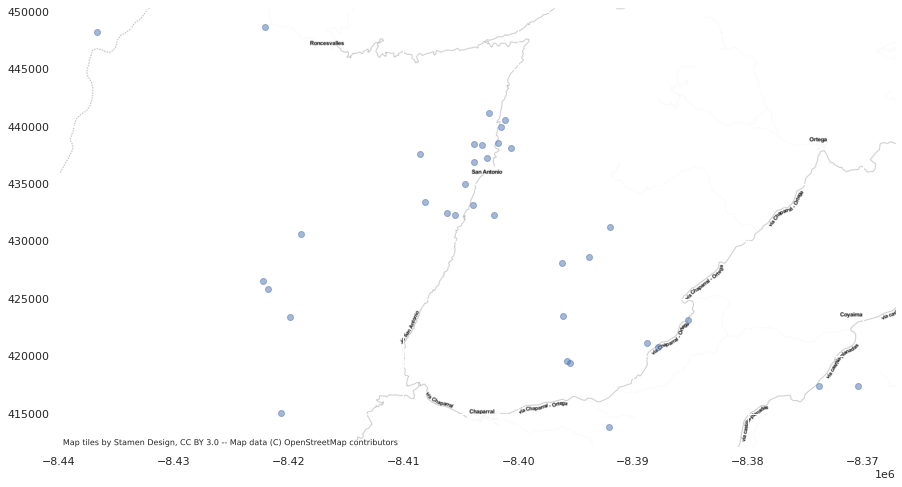

In [55]:
fig,ax = plt.subplots(figsize=(15,15))
p = p.to_crs(epsg=3857)
p.plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 

In [56]:
df_consolited['GEO_DATABASE'] = True
df_consolited['GOOGLE_MAPS'] = False
df_consolited['OPEN_STREET_MAPS'] = False
df_consolited['AERIAL_PHOTOGRAPH']  = False
df_consolited['CARTOGRAPHIC_SHEET'] = False

In [68]:
temp = df_consolited.sample(n = 50)

In [69]:
temp.columns = temp.columns.str.upper()

In [70]:
temp

,ESTADO_DRENAJE,PROYECTO,SYMBOL,DISPERSION,NOMBRE_GEOGRAFICO,PK_CUE,CAMBIO,VIGENCIA,FECHA_MODIFICACION,HOJA,PK_CUE_CAMBIO,RULEID,OBJECT_ID_ORIGEN,SHAPE_LENGTH,GEOMETRY,ORIGIN_LAYER,TIPO,SHAPE_AREA,CODIGO_USO_EDIFICACION,ROTACION,CODIGO_NOMBRE,FUNCION_PUENTE,SITE,DICTIONARY,GEO_DATABASE,GOOGLE_MAPS,OPEN_STREET_MAPS,AERIAL_PHOTOGRAPH,CARTOGRAPHIC_SHEET
384,5102.0,NaN,2,0,Quebrada Pilacó,4845569.0,NaN,0,2015-04-22T00:00:00+00:00,282IID,NaN,1.0,939678.0,595.969642,MULTILINESTRING Z ((4751197.800 1974644.615 0....,Drenaje_Sencillo,NaN,NaN,NaN,NaN,NaN,NaN,Quebrada,False,True,False,False,False,False
2196,NaN,NaN,1,NaN,La Florida,7099662.0,NaN,0,2016-08-30T00:00:00+00:00,281IIA,NaN,10.0,NaN,NaN,POINT Z (4710736.633 1978740.345 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,False,True,False,False,False,False
398,5102.0,NaN,2,0,Quebrada Cajón,4845706.0,NaN,0,2015-04-22T00:00:00+00:00,282IID,NaN,1.0,939835.0,639.246054,MULTILINESTRING Z ((4750536.364 1970235.867 0....,Drenaje_Sencillo,NaN,NaN,NaN,NaN,NaN,NaN,Quebrada,False,True,False,False,False,False
63,5101.0,NaN,2,0,Quebrada El Chorro,1869901.0,NaN,0,2015-03-05T00:00:00+00:00,282IIA,NaN,3.0,900877.0,1787.072887,MULTILINESTRING Z ((4730491.122 1978448.671 0....,Drenaje_Sencillo,NaN,NaN,NaN,NaN,NaN,NaN,Quebrada,False,True,False,False,False,False
2389,NaN,NaN,1,NaN,La Primavera,1294418.0,NaN,0,2016-09-07T00:00:00+00:00,281IIC,NaN,10.0,NaN,NaN,POINT Z (4702765.536 1967173.541 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,False,True,False,False,False,False
42,5101.0,NaN,2,0,Quebrada El Quebradón,1893452.0,NaN,0,2014-12-05T00:00:00+00:00,262IVC,NaN,3.0,605700.0,4801.708842,MULTILINESTRING Z ((4705381.279 1990632.196 0....,Drenaje_Sencillo,NaN,NaN,NaN,NaN,NaN,NaN,Quebrada,False,True,False,False,False,False
1296,NaN,NaN,1,NaN,Mirolindo,5521161.0,NaN,0,2015-10-31T00:00:00+00:00,282IVC,NaN,10.0,1002563.0,NaN,POINT Z (4739909.506 1950873.998 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,False,True,False,False,False,False
1643,NaN,NaN,1,NaN,El Mandarino,1299978.0,NaN,0,2015-04-28T00:00:00+00:00,263IIID,NaN,10.0,NaN,NaN,POINT Z (4725632.886 1990306.314 0.000),Construccion_P,NaN,NaN,4101,NaN,NaN,NaN,NaN,False,True,False,False,False,False
128,5101.0,NaN,2,0,Quebrada Las Cruces,1870939.0,NaN,0,2015-03-05T00:00:00+00:00,282IIA,NaN,3.0,901824.0,2707.968967,MULTILINESTRING Z ((4732099.857 1985965.554 0....,Drenaje_Sencillo,NaN,NaN,NaN,NaN,NaN,NaN,Quebrada,False,True,False,False,False,False
535,5101.0,NaN,2,0,Cañada La Calera,1892423.0,NaN,0,2015-04-28T00:00:00+00:00,263IIID,NaN,3.0,NaN,929.706853,MULTILINESTRING Z ((4726388.323 1988063.264 0....,Drenaje_Sencillo,NaN,NaN,NaN,NaN,NaN,NaN,Cañada,False,True,False,False,False,False


In [71]:
temp.to_pickle("geo_datase_sample_50.pkl")

## Merge OPM with consolited

In [92]:
import osmnx as ox
import matplotlib.pyplot as plt

In [93]:
place_name = "Kamppi, Helsinki, Finland"
graph = ox.graph_from_place(place_name)
type(graph)

networkx.classes.multidigraph.MultiDiGraph

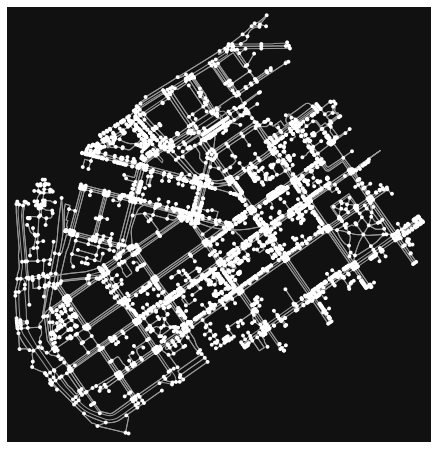

<Figure size 432x288 with 0 Axes>

In [94]:
fig, ax = ox.plot_graph(graph)
plt.tight_layout()

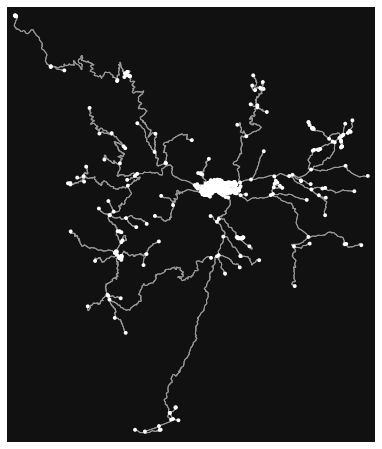

In [95]:
place_name = "Chaparral, Tolima, Colombia"
graph = ox.graph_from_place(place_name)
fig, ax = ox.plot_graph(graph)

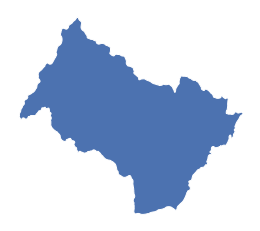

In [96]:
#area = ox.gdf_from_place(place_name)
#buildings = ox.buildings_from_place(place_name)
#type(area)
city = ox.geocode_to_gdf('Chaparral, Tolima, Colombia')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

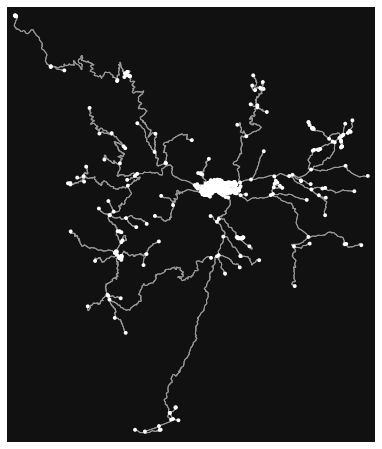

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [97]:
place_name = 'Chaparral, Tolima, Colombia'
ox.plot_graph(ox.graph_from_place(place_name))

In [98]:
nodes, edges = ox.graph_to_gdfs(graph)
nodes.head(50)

,y,x,street_count,geometry
osmid,,,,
421667564,3.735641,-75.405979,3,POINT (-75.40598 3.73564)
421668351,3.722786,-75.484921,4,POINT (-75.48492 3.72279)
421668352,3.723795,-75.486205,4,POINT (-75.48620 3.72379)
421668354,3.720362,-75.490041,3,POINT (-75.49004 3.72036)
421680214,3.726069,-75.506088,4,POINT (-75.50609 3.72607)
421680282,3.725455,-75.577053,3,POINT (-75.57705 3.72545)
421697216,3.677276,-75.587879,3,POINT (-75.58788 3.67728)
421697235,3.665653,-75.583990,3,POINT (-75.58399 3.66565)
421740442,3.723942,-75.485076,4,POINT (-75.48508 3.72394)


In [99]:
# get all parks and bus stops in some neighborhood
tags = {"leisure": True, "highway": True, "building": True, "amenity": True}
gdf = ox.geometries_from_place(place_name, tags)
gdf.shape

(9630, 67)

In [100]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [101]:
gdf.iloc[0:10,0:4]

name place  \
element_type osmid                                         
node         446193274   Iglesia San Juan Bautista   NaN   
             446193277                   Casa Café   NaN   
             446193278  Hospital San Juan Bautista   NaN   
             446193290               Zona de Taxis   NaN   
             703219383                 Esc. Icarco   NaN   
             703219395             Esc. Helechales   NaN   
             703219440          Esc. Dos Quebradas   NaN   
             703219477             Esc. Astilleros   NaN   
             703219744           Esc. Buenos Aires   NaN   
             703219835            Esc. La Jazminia   NaN   

                                         geometry           amenity  
element_type osmid                                                   
node         446193274  POINT (-75.48469 3.72477)  place_of_worship  
             446193277  POINT (-75.48557 3.72471)              cafe  
             446193278  POINT (-75.48460 3.72683)          hospital  
             446193290  POINT (-75.48532 3.72422)              taxi  
             703219383  POINT (-75.59913 3.61194)            school  
             703219395  POINT (-75.58986 3.68268)            school  
             703219440  POINT (-75.61180 3.73523)            school  
             703219477  POINT (-75.59002 3.76242)            school  
             703219744  POINT (-75.57414 3.68468)            school  
             703219835  POINT (-75.58577 3.70044)            school

In [102]:
gdf.columns

Index(['name', 'place', 'geometry', 'amenity', 'denomination', 'religion',
       'cuisine', 'emergency', 'source', 'comment', 'divipola', 'fixme',
       'is_in', 'note', 'addr:street', 'designation', 'addr:housenumber',
       'addr:postcode', 'building', 'email', 'phone', 'atm', 'brand',
       'fuel:GTL_diesel', 'fuel:HGV_diesel', 'fuel:biodiesel', 'fuel:biogas',
       'fuel:cng', 'fuel:diesel', 'fuel:electricity', 'fuel:gasoline',
       'fuel:lpg', 'operator', 'takeaway', 'name:es', 'leisure', 'healthcare',
       'diet:vegetarian', 'internet_access', 'highway', 'nodes', 'mechanical',
       'surface', 'alt_name', 'oneway', 'lanes', 'bridge', 'layer',
       'tracktype', 'lit', 'width', 'fee', 'access', 'crossing', 'foot',
       'footway', 'service', 'junction', 'sport', 'landuse', 'bicycle',
       'horse', 'building:part', 'shop', 'industrial', 'barrier', 'craft'],
      dtype='object')